# Three-dimensional images, NIfTI

For this notebook you will need:

* [ds114 structural image]({{ site.url }}{{ site.baseurl }}/data/ds114_sub009_highres.nii).


In [1]:
# Our usual set-up
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Set 'gray' as the default colormap
plt.rcParams['image.cmap'] = 'gray'
# Display array values to 4 digits of precision
np.set_printoptions(precision=4, suppress=True)

We will spend a lot of time loading data from brain images.

MRI images for functional MRI are usually stored using the [NIfTi
format](https://nifti.nimh.nih.gov/nifti-1).

As you've already seen, this is a very simple format that is typically a
single file with extension .  If the file is compressed, it will end with
`.nii.gz` instead.

Inside, the file contains:

* 352 bytes of *header* information.  The header gives the 3D or 4D shape of
  the file, and the data type of the pixel (voxel) data among other things.

* Usually, directly after the header, we have the image data.  If the image
  data is shape (I, J, K), and S is the number of bytes to store one pixel
  (voxel) value, then the image data is I \* J \* K \* S in length.  For
  example, the image might be shape 64, 64, 32, and the data type might be
  64-bit float, which is 8 bytes long, so the image data would be 64 \* 64 \*
  32 \* 8 bytes long.

To load these images into MATLAB, use the
[SPM](http://www.fil.ion.ucl.ac.uk/spm/) package.  Here we are using Python,
and the [Nibabel](http://nipy.org/nibabel) package.

Start by importing the nibabel library:

In [2]:
import nibabel as nib

Load the image into memory:

In [3]:
img = nib.load('ds114_sub009_highres.nii')
img

The image has a "header" containing the information about the image:

In [4]:
print(img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 256 156 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [ 1.      1.      1.3002  1.      0.0097  0.      0.      0.    ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FSL5.0'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.11747453361749649
quatern_c       : 0.008146101608872414
quatern_d       : 0.022481605410575867
qoffset_x       : -129

I can also get the same information from FSL's `fslinfo`. You can check, if
you have FSL installed.  Run this command from the terminal:

```
fslinfo ds114_sub009_highres.nii
```

We can load the image data as an array with:

In [5]:
data = img.get_data()
data.shape

(256, 156, 256)

Think of this as 256 2D images, stacked on top of one another.  Each 2D image
is a "slice", of shape (256, 156).

The first (bottom) slice:

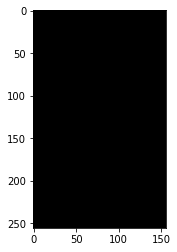

In [6]:
plt.imshow(data[:, :, 0])

The middle slice:

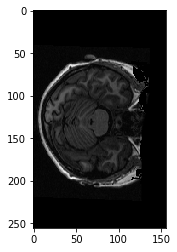

In [7]:
plt.imshow(data[:, :, 127])

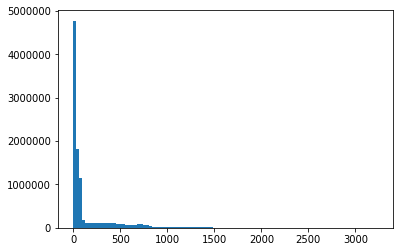

In [8]:
plt.hist(data.ravel(), bins=100);

As for any array, we can transpose it:

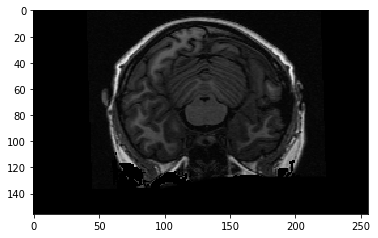

In [9]:
plt.imshow(data[:, :, 127].T)

To get the display you usually see, we need to transpose and flip up to down:

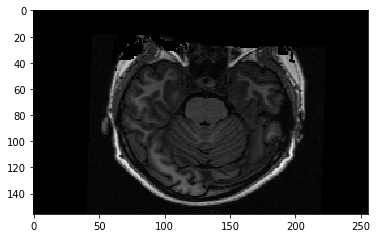

In [10]:
plt.imshow(np.flipud(data[:, :, 127].T))

We are looking at a slice over the third dimension.  We can see that the slices over this dimension are 2D images, where left to right is the first axis, and back to front is the second axis.

We can also think of this 3D image as a stack of 2D images where the 2D images are (back to front, bottom to top).   Like this:

In [11]:
yz_slice = data[127, :, :]
yz_slice.shape

(156, 256)

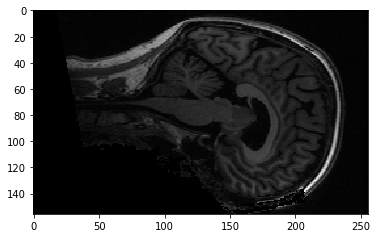

In [12]:
plt.imshow(yz_slice)

Here, we have all the pixels corresponding to 127 in the left to right
direction, giving us an image of shape (156, 256).  You will see these
alternative slices in the FSL viewer.

Here's a coronal slice:

In [13]:
xz_slice = data[:, 78, :]
xz_slice.shape

(256, 256)

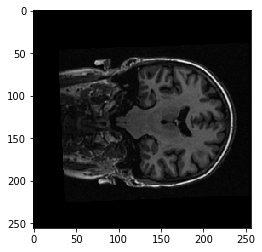

In [14]:
plt.imshow(xz_slice)